## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [22]:
from google.colab import drive
drive.mount('../content/gdrive')

Drive already mounted at ../content/gdrive; to attempt to forcibly remount, call drive.mount("../content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/AIML/Projects/CNN/Project2/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall(path=project_path)

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall(path=project_path)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [29]:
labels = pd.read_csv('/content/gdrive/My Drive/AIML/Projects/CNN/Project2/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [30]:
labels.sample(10,random_state=10)

,id,breed
8122,cb0716607f4e66bc5bba7532bedf293b,english_foxhound
3856,5f886388c9da2c09d6e3adde3c247243,irish_setter
7654,bfbc332f78159db3fa558392311ffed8,rottweiler
9144,e5be21baaf39b50fca94e56c3b29416d,irish_terrier
7436,ba6eda43b8cf8607e9f7af6dbfaf9538,clumber
4125,66c22f37d5db2318dd6a8f8bf0978180,shetland_sheepdog
5772,91af963a2f4cc1b5ab4f7e5d257b4830,lakeland_terrier
2648,419a994803b6436b2ff3220b192b883d,pekinese
7170,b3c360cdc204d571b5287268fa4b4c25,samoyed
5154,824ad38b99412399623a46ae6a70fad8,sussex_spaniel


### Print the count of each category of Dogs given in the dataset



In [31]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
japanese_spaniel                  105
beagle                            105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
whippet                            95
siberian_husky                     95
norwegian_elkhound                 95
pug         

In [0]:
import cv2

### Get one-hot encodings of labels

In [0]:
import keras

In [34]:
np.count_nonzero(labels)

20444

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
X=[]
Y=[]

In [0]:
import os
from tqdm import tqdm

In [37]:
for i in tqdm(labels['id']):
  record = cv2.imread('/content/gdrive/My Drive/AIML/Projects/CNN/Project2/train/'+i+'.jpg')
  X.append(cv2.resize(record,(128,128)))



  0%|          | 0/10222 [00:00<?, ?it/s]

  0%|          | 10/10222 [00:00<01:49, 93.23it/s]

  0%|          | 19/10222 [00:00<01:51, 91.33it/s]

  0%|          | 30/10222 [00:00<01:48, 94.00it/s]

  0%|          | 38/10222 [00:00<01:56, 87.22it/s]

  0%|          | 47/10222 [00:00<01:55, 87.82it/s]

  1%|          | 57/10222 [00:00<01:53, 89.64it/s]

  1%|          | 67/10222 [00:00<01:50, 91.81it/s]

  1%|          | 76/10222 [00:00<01:51, 91.02it/s]

  1%|          | 85/10222 [00:00<01:52, 89.93it/s]

  1%|          | 95/10222 [00:01<01:51, 90.80it/s]

  1%|          | 104/10222 [00:01<01:52, 89.77it/s]

  1%|          | 113/10222 [00:01<01:53, 89.45it/s]

  1%|          | 123/10222 [00:01<01:50, 91.64it/s]

  1%|▏         | 133/10222 [00:01<01:52, 89.99it/s]

  1%|▏         | 143/10222 [00:01<01:51, 90.77it/s]

  1%|▏         | 153/10222 [00:01<01:55, 87.23it/s]

  2%|▏         | 163/10222 [00:01<01:51, 90.62it/s]

  2%|▏         | 173/10222 [00:01<01:53, 88.16it/s]

  2%|▏     

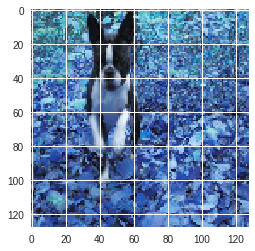

In [38]:
plt.imshow(cv2.resize(X[0],(128,128)))

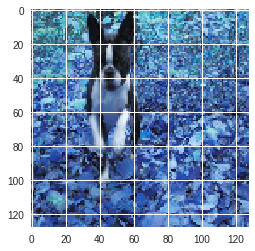

In [39]:
plt.imshow(X[0])

In [40]:
len(X)

10222

In [41]:
X[0].shape

(128, 128, 3)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels['breed_y'] = le.fit_transform(labels['breed'])

In [43]:
Y = keras.utils.to_categorical(labels['breed_y'],num_classes=np.count_nonzero(labels['breed_y'].value_counts()))
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
labels['breed'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
japanese_spaniel                  105
beagle                            105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
whippet                            95
siberian_husky                     95
norwegian_elkhound                 95
pug         

In [45]:
labels['breed_y'].value_counts()

97     126
73     117
1      116
42     115
11     114
100    112
87     111
52     111
7      110
94     109
3      107
109    107
69     106
26     106
61     105
9      105
13     102
75     102
6      102
59     101
68      99
93      99
84      96
80      95
101     95
117     95
88      94
30      93
60      92
86      92
      ... 
18      75
85      75
51      75
21      75
47      75
38      74
32      74
4       74
72      73
24      73
89      72
34      72
44      72
16      72
106     72
103     71
29      71
66      71
112     70
45      70
46      69
48      69
113     69
108     69
83      69
22      67
49      67
65      67
23      66
43      66
Name: breed_y, Length: 120, dtype: int64

In [46]:
np.count_nonzero(labels['breed'].value_counts())

120

In [47]:
labels.count()

id         10222
breed      10222
breed_y    10222
dtype: int64

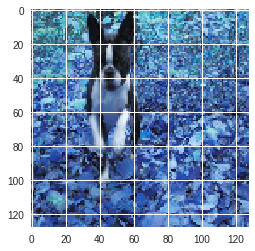

In [48]:
plt.imshow(cv2.resize(X[0],(128,128)))

In [49]:
len(Y)

10222

In [0]:
x_train_data = np.array(X)
y_train_data = np.array(Y)

In [51]:
x_train_data.shape

(10222, 128, 128, 3)

In [52]:
y_train_data.shape

(10222, 120)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train_data,y_train_data,test_size=0.3,random_state=9)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test = pd.read_csv('/content/gdrive/My Drive/AIML/Projects/CNN/Project2/sample_submission.csv')
test_img = test['id']

Run the below code to load the test image files in x_test_feature

In [0]:
from tqdm import tqdm

In [56]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    #img = cv2.imread('/content/gdrive/My Drive/AIML/Projects/CNN/Project2/test/'+f+'.jpg'.format(f), 0)
    img = cv2.imread('/content/gdrive/My Drive/AIML/Projects/CNN/Project2/test/'+f+'.jpg')
    img_resize = cv2.resize(img, (128, 128)) 
    x_test_feature.append(img_resize)



  0%|          | 0/10357 [00:00<?, ?it/s]

  0%|          | 10/10357 [00:00<01:49, 94.41it/s]

  0%|          | 20/10357 [00:00<01:49, 94.34it/s]

  0%|          | 31/10357 [00:00<01:47, 96.28it/s]

  0%|          | 42/10357 [00:00<01:44, 98.26it/s]

  1%|          | 53/10357 [00:00<01:43, 99.83it/s]

  1%|          | 62/10357 [00:00<01:48, 94.77it/s]

  1%|          | 72/10357 [00:00<01:49, 94.15it/s]

  1%|          | 81/10357 [00:00<01:52, 91.72it/s]

  1%|          | 91/10357 [00:00<01:49, 93.74it/s]

  1%|          | 102/10357 [00:01<01:46, 96.06it/s]

  1%|          | 112/10357 [00:01<01:45, 96.74it/s]

  1%|          | 122/10357 [00:01<01:46, 96.51it/s]

  1%|▏         | 132/10357 [00:01<01:45, 97.26it/s]

  1%|▏         | 142/10357 [00:01<01:45, 96.95it/s]

  1%|▏         | 153/10357 [00:01<01:43, 98.58it/s]

  2%|▏         | 164/10357 [00:01<01:41, 100.02it/s]

  2%|▏         | 174/10357 [00:01<01:43, 98.70it/s] 

  2%|▏         | 184/10357 [00:01<01:46, 95.57it/s]

  2%|▏  

Normalize the test data and convert it into 4 dimensions

In [57]:
np.array(x_test_feature).shape

(10357, 128, 128, 3)

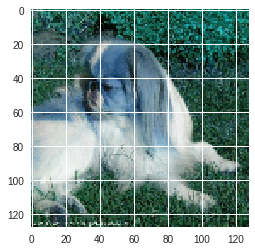

In [58]:
plt.imshow(x_test_feature[0])

In [0]:
X_train = X_train/255
X_test = X_test/255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import tensorflow as tf
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dense,Dropout,BatchNormalization

In [62]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,3),input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(5,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 63, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 61, 32)        15392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 30, 32)        128       
_________________________________________________________________
flat

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
X_train.shape

(7155, 128, 128, 3)

### Use batch_size = 128 and epochs = 10 and execute the model

In [65]:
model.fit(x=X_train,y=Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 14s 2ms/step - loss: 4.8357 - acc: 0.0222 - val_loss: 4.9185 - val_acc: 0.0293
Epoch 2/10
7155/7155 [==============================] - 8s 1ms/step - loss: 3.8953 - acc: 0.1494 - val_loss: 4.6664 - val_acc: 0.0391
Epoch 3/10
7155/7155 [==============================] - 8s 1ms/step - loss: 2.2031 - acc: 0.5729 - val_loss: 4.8176 - val_acc: 0.0284
Epoch 4/10
7155/7155 [==============================] - 8s 1ms/step - loss: 0.4031 - acc: 0.9757 - val_loss: 4.7813 - val_acc: 0.0437
Epoch 5/10
7155/7155 [==============================] - 8s 1ms/step - loss: 0.0465 - acc: 0.9992 - val_loss: 4.7096 - val_acc: 0.0460
Epoch 6/10
7155/7155 [==============================] - 8s 1ms/step - loss: 0.0181 - acc: 0.9996 - val_loss: 4.7607 - val_acc: 0.0470
Epoch 7/10
7155/7155 [==============================] - 8s 1ms/step - loss: 0.0124 - acc: 0.9994 - 

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

### Make all the layers in the base_model (VGG16) to be non-trainable

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%